# ZADANIE: Model Card Tensor

- przygotuj dataframe w oparciu o specyfikacje "model cards" dla poszczególnych modeli

# DOCS

- [dokumentacja pliku HF:`config.json`](https://huggingface.co/docs/transformers/main_classes/configuration)
- model cards:
  1. [Bielik-7B-v0.1](https://huggingface.co/speakleash/Bielik-7B-v0.1)
  2. [Llama-3.1-8B](https://huggingface.co/meta-llama/Llama-3.1-8B)
  3. [Mistral-7B-v0.1](https://huggingface.co/mistralai/Mistral-7B-v0.1)
  4. dla ambitnych 🔥 (inna struktura)
    - [DeepSeek-R1](https://huggingface.co/deepseek-ai/DeepSeek-R1)
    - [Qwen2.5-7B](https://huggingface.co/Qwen/Qwen2.5-7B)

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
import json
import sys
import os
import pandas as pd

base = Path(os.getcwd())
pattern = "*-config.json"
matches = sorted(base.rglob(pattern))
files = [p.name for p in matches]
# print(files)
# print(json.dumps(files, indent=2))

failing = []
model_cards = []

for p in matches:
    try:
        with p.open('r', encoding='utf-8') as f:
            data = json.load(f)
        model_cards.append({
            'filename': p.name,
            'json': data
        })
    except json.JSONDecodeError:
        failing.append(f"Niepoprawny format JSON (Pusty/Błędny) w pliku: {p.name}")
    except ValueError as e:
        failing.append(f"Błąd danych: {e} Plik: {p.name}")
    except Exception as e:
        failing.append(f"Inny nieznany błąd przy wczytywaniu {p.name}: {e}")

if len(failing):
    print(failing)
else:
    print('All models calrds loaded successfully')

df = pd.DataFrame(model_cards)
df['model_type'] = df['json'].apply(lambda x: x.get('model_type', None))
df_wynikowy = df[['filename', 'model_type']]

display(df_wynikowy)



All models calrds loaded successfully


,filename,model_type
0,Bielik-7B-Instruct-v0.1-config.json,mistral
1,DeepSeek-R1-config.json,deepseek_v3
2,Llama-3.1-8B-config.json,llama
3,Mistral-7B-v0.1-config.json,mistral
4,Qwen2.5-7B-Instruct-config.json,qwen2


In [3]:
import pandas as pd

def generate_blank(c):
    return ['[?, ?]' for _ in range(c)]

data = {
    'Bielik-7B-Instruct-v0.1': generate_blank(10),
    'Llama-3.1-8B': generate_blank(10),
    'Mistral-7B-v0.1': generate_blank(10),
    'DeepSeek-R1': generate_blank(10),
    'Qwen2.5-7B': generate_blank(10),
}

tensors = [
    'embed_tokens.weight',
    'input_layernorm.weight',
    'mlp.down_proj.weight',
    'mpl.gate_proj.weight',
    'mpl.up_proj.weight',
    'post_attention_layernorm.weight',
    'self_attn.k_proj.weight',
    'self_attn.o_proj.weight',
    'self_attn.q_proj.weight',
    'self_attn.v_proj.weight',
]

df = pd.DataFrame(data, index=tensors)

display(df)
display(df.T) # transpozycja (obrócenie)



,Bielik-7B-Instruct-v0.1,Llama-3.1-8B,Mistral-7B-v0.1,DeepSeek-R1,Qwen2.5-7B
embed_tokens.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
input_layernorm.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
mlp.down_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
mpl.gate_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
mpl.up_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
post_attention_layernorm.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
self_attn.k_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
self_attn.o_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
self_attn.q_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
self_attn.v_proj.weight,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"


,embed_tokens.weight,input_layernorm.weight,mlp.down_proj.weight,mpl.gate_proj.weight,mpl.up_proj.weight,post_attention_layernorm.weight,self_attn.k_proj.weight,self_attn.o_proj.weight,self_attn.q_proj.weight,self_attn.v_proj.weight
Bielik-7B-Instruct-v0.1,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
Llama-3.1-8B,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
Mistral-7B-v0.1,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
DeepSeek-R1,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"
Qwen2.5-7B,"[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]","[?, ?]"


,Model,Type,Layers,Hidden size,Attention heads,Intermediate size,Vocab size,Max position embeddings
0,Llama-3.1-8B,llama,32,4096,32,14336,128256,131072
1,Qwen2.5-7B-Instruct,qwen2,28,3584,28,18944,152064,32768
2,Bielik-7B-Instruct-v0.1,mistral,32,4096,32,14336,32000,4096
3,Mistral-7B-v0.1,mistral,32,4096,32,14336,32000,32768
4,DeepSeek-R1,deepseek_v3,61,7168,128,18432,129280,163840


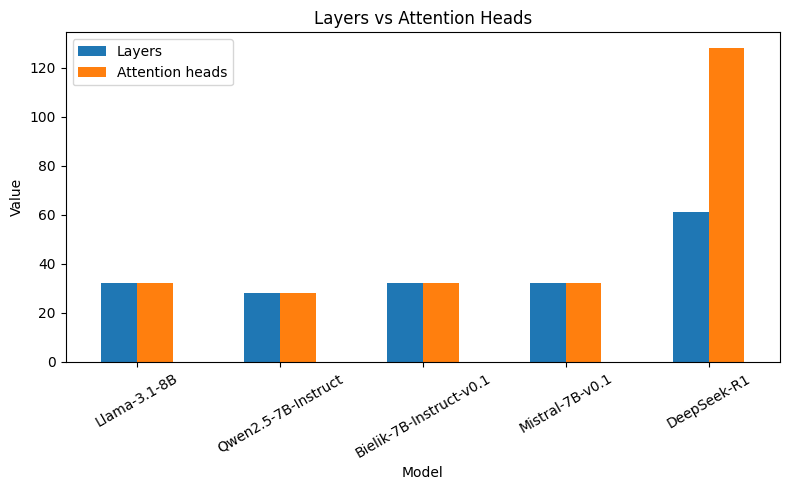

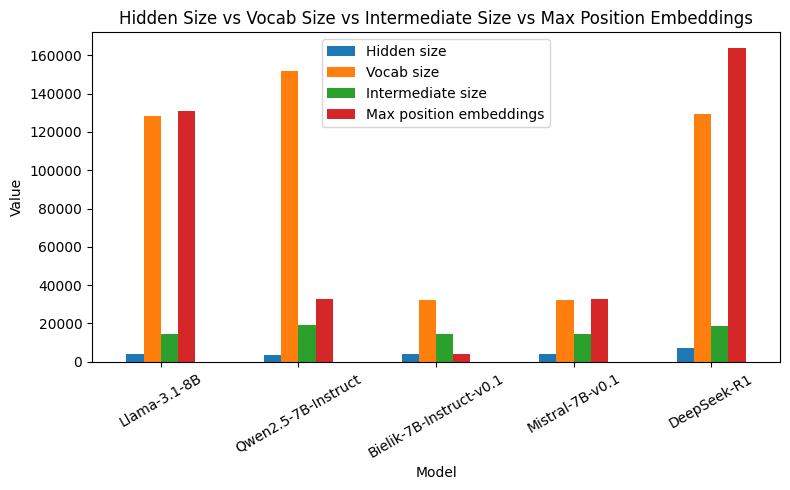

In [6]:
import os
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Wczytaj wszystkie pliki konfiguracyjne modeli
config_dir = Path('hf-configs')
configs = list(config_dir.glob('*-config.json'))

models = []
for cfg_path in configs:
    with open(cfg_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    # Wyciągnij kluczowe parametry
    models.append({
        'Model': cfg_path.stem.replace('-config', ''),
        'Type': data.get('model_type'),
        'Layers': data.get('num_hidden_layers'),
        'Hidden size': data.get('hidden_size'),
        'Attention heads': data.get('num_attention_heads'),
        'Intermediate size': data.get('intermediate_size'),
        'Vocab size': data.get('vocab_size'),
        'Max position embeddings': data.get('max_position_embeddings'),
    })

# Stwórz DataFrame
models_df = pd.DataFrame(models)

# Wyświetl tabelę
display(models_df)

# Wizualizacja: porównanie liczby warstw i rozmiaru ukrytego
fig, ax = plt.subplots(figsize=(8, 5))
models_df.plot(kind='bar', x='Model', y=['Layers', 'Attention heads'], ax=ax)
plt.title('Layers vs Attention Heads')
plt.ylabel('Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Wizualizacja: rozmiar słownika i max długość sekwencji
fig, ax = plt.subplots(figsize=(8, 5))
models_df.plot(kind='bar', x='Model', y=['Hidden size', 'Vocab size', 'Intermediate size', 'Max position embeddings'], ax=ax)
plt.title('Hidden Size vs Vocab Size vs Intermediate Size vs Max Position Embeddings')
plt.ylabel('Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
